# EDA - Multivariate Analysis

### Import Basic Packages & Data 

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data to a pandas dataframe
df = pd.read_csv('phone_marketplace_dataset.csv')
df

,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,original_sale_price,#_of_previous_owners,megapixel
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,747,1,12
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,888,1,16
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,1185,1,22
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,887,1,20
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,969,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1326,2022,iPhone_14,91,64,yes,craigslist,0,0,no,1394,1,22
345,458,2019,iPhone_11,75,256,no,facebook,3,3,no,702,2,12
346,487,2019,iPhone_11,87,256,no,facebook,1,7,no,781,2,12
347,1340,2022,iPhone_14,100,256,yes,craigslist,0,0,no,1411,1,22


## Continuous vs Continuous variable analysis

In [3]:
# Description of task
df.corr()

,price,year_made,battery_life_percentage,storage,years_owned,visible_scratches,original_sale_price,#_of_previous_owners,megapixel
price,1.000000,0.932996,0.757472,0.013444,-0.728310,-0.501578,0.969247,-0.466212,0.927348
year_made,0.932996,1.000000,0.791348,0.045293,-0.778707,-0.543982,0.903629,-0.461059,0.990231
battery_life_percentage,0.757472,0.791348,1.000000,0.046787,-0.586934,-0.389451,0.711322,-0.433024,0.804617
storage,0.013444,0.045293,0.046787,1.000000,0.015829,0.019609,0.039849,0.063396,0.034712
years_owned,-0.728310,-0.778707,-0.586934,0.015829,1.000000,0.448239,-0.713480,0.373800,-0.744650
visible_scratches,-0.501578,-0.543982,-0.389451,0.019609,0.448239,1.000000,-0.493424,0.246271,-0.534336
original_sale_price,0.969247,0.903629,0.711322,0.039849,-0.713480,-0.493424,1.000000,-0.307546,0.888218
#_of_previous_owners,-0.466212,-0.461059,-0.433024,0.063396,0.373800,0.246271,-0.307546,1.000000,-0.489932
megapixel,0.927348,0.990231,0.804617,0.034712,-0.744650,-0.534336,0.888218,-0.489932,1.000000


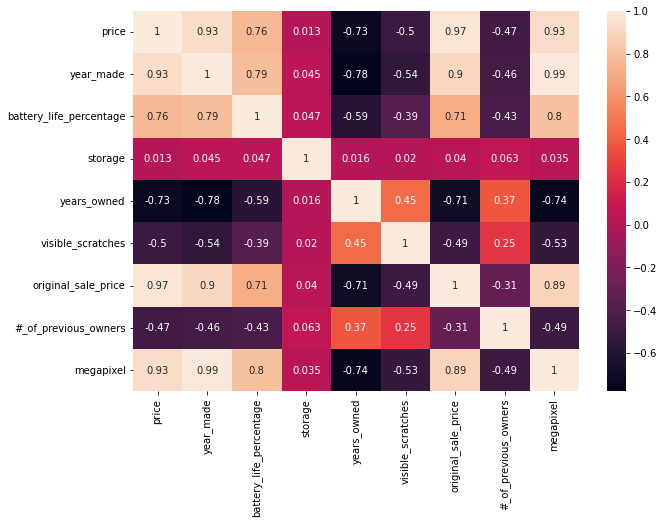

In [4]:
# Correlation matrix heatmap, default to pearson correlation
plt.rcParams['figure.figsize']=(10,7)
heatmap = sns.heatmap(df.corr(), annot=True)

### Scatter plots to visualise the correlations


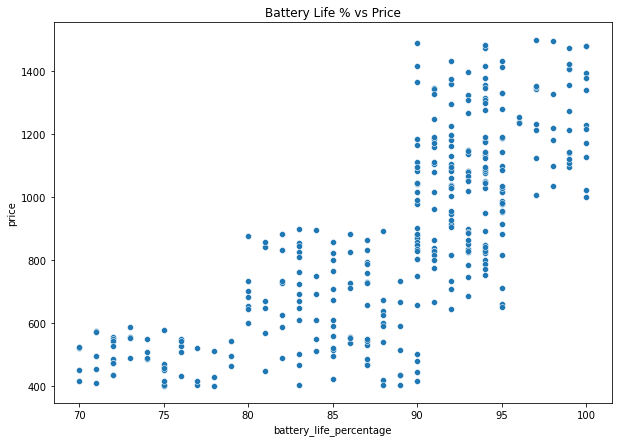

In [5]:
ax1 = sns.scatterplot(data=df, x="battery_life_percentage", y="price")
ax1.set(title = 'Battery Life % vs Price')
plt.show()

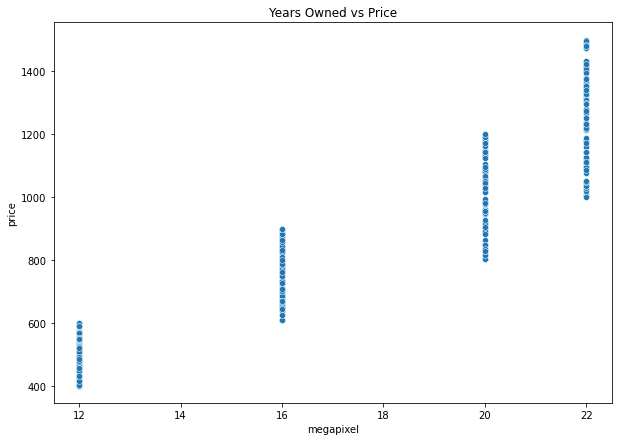

In [6]:
ax2 = sns.scatterplot(data=df, x="megapixel", y="price")
ax2.set(title = 'Years Owned vs Price')
plt.show()

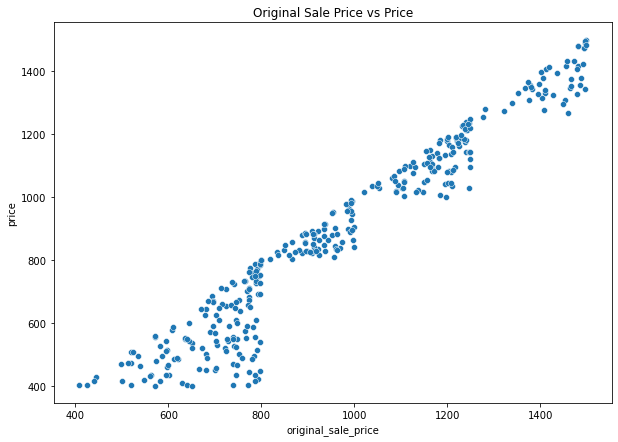

In [7]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df, x="original_sale_price", y="price")
ax.set(title = 'Original Sale Price vs Price')
plt.show()

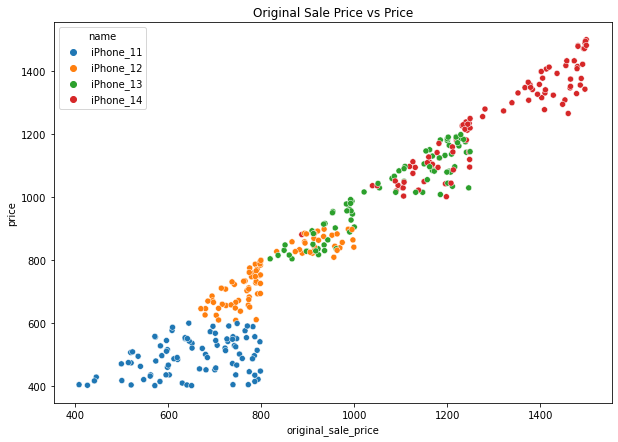

In [8]:
ax3 = sns.scatterplot(data=df, x="original_sale_price", y ="price", hue="name")
ax3.set(title = 'Original Sale Price vs Price')
plt.show()

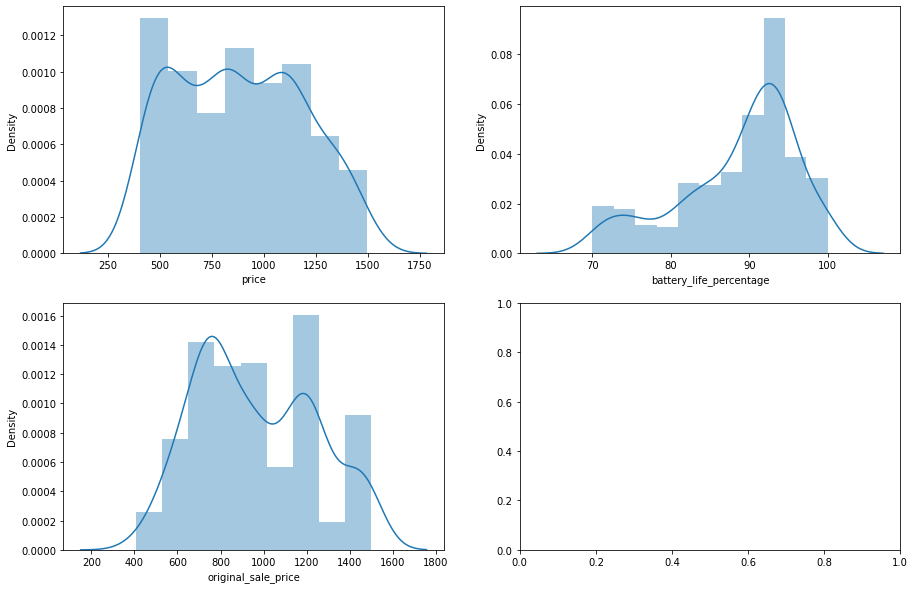

In [9]:
# figure out way to make it into one line and not two

fig, axes = plt.subplots(2,2, figsize=(15, 10))

sns.distplot(df['price'], ax=axes[0,0])
sns.distplot(df['battery_life_percentage'], ax=axes[0,1])
sns.distplot(df['original_sale_price'], ax=axes[1,0])

fig.show()

## Categorical vs Continuous variable analysis

In [10]:
df.groupby("name")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
iPhone_11,89.0,495.213483,58.711829,402.0,446.00,497.0,545.00,600.0
iPhone_12,85.0,759.329412,85.997424,609.0,683.00,753.0,833.00,898.0
iPhone_13,81.0,1013.135802,124.003906,804.0,905.00,1029.0,1124.00,1198.0
iPhone_14,94.0,1242.638298,149.731146,881.0,1109.25,1252.0,1355.75,1499.0


In [11]:
df.groupby("marketplace")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
marketplace,,,,,,,,
craigslist,113.0,908.371681,288.975907,402.0,666.00,885.0,1124.00,1478.0
facebook,128.0,862.390625,302.255334,404.0,597.75,828.0,1106.75,1489.0
kijiji,108.0,874.601852,325.879226,402.0,553.25,922.0,1133.00,1499.0


<AxesSubplot:xlabel='name', ylabel='price'>

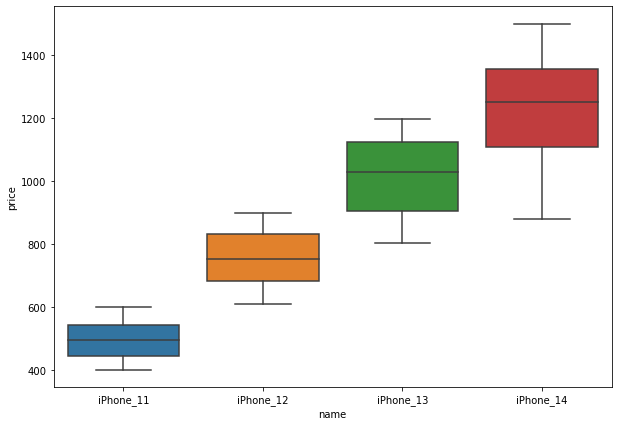

In [12]:
sns.boxplot(data=df, x="name", y="price")

In [ ]:
sns.boxplot(data=df, x="marketplace", y="price", showmeans = True, meanprops={"markerfacecolor":"white"})

### Categorical vs Categorical variable analysis

In [16]:
# changing price into a categorical variable

avg_price_11 = df.groupby("name")['price'].mean()[0]
avg_price_12 = df.groupby("name")['price'].mean()[1]
avg_price_13 = df.groupby("name")['price'].mean()[2]
avg_price_14 = df.groupby("name")['price'].mean()[3]

df['price_category'] = np.where(
                                (
                                    ((df['price'] > avg_price_11) & (df['name'] == 'iPhone_11')) |
                                    ((df['price'] > avg_price_12) & (df['name'] == 'iPhone_12')) |
                                    ((df['price'] > avg_price_13) & (df['name'] == 'iPhone_13')) |
                                    ((df['price'] > avg_price_14) & (df['name'] == 'iPhone_14'))
                                ),
                                'Above average', 'Below average'
                                )
df['price_category']

0      Above average
1      Above average
2      Below average
3      Below average
4      Above average
           ...      
344    Above average
345    Below average
346    Below average
347    Above average
348    Above average
Name: price_category, Length: 349, dtype: object

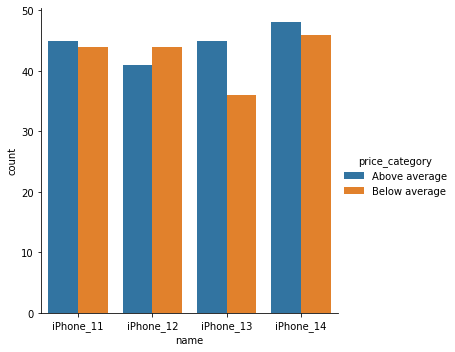

In [18]:
# Countplot to see how many prices are above or below average to see skew
sns.catplot(data=df, x="name", hue = 'price_category', kind='count')

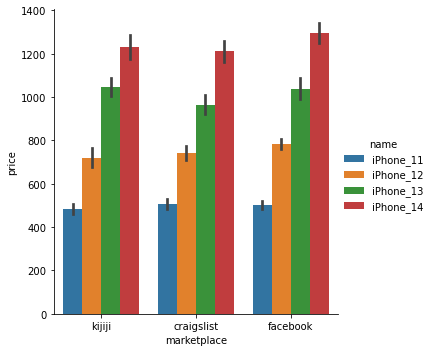

In [20]:
# Multi-level bar chart created by segmenting a relationship between marketplace and price with name of phone
sns.catplot(data=df, x="marketplace", y="price", hue = 'name', kind='bar')

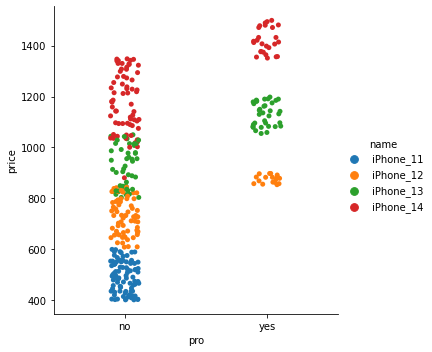

In [21]:
# Multi-level scatter chart created by segmenting the relationship between pro and price with name of phone
sns.catplot(data=df, x="pro", y="price", hue = 'name')

### Creating plots and statistics to find relationships between continuous data

In [ ]:
df_cars = pd.read_csv('indian_cars_dataset.csv')
df_cars

In [ ]:
# Descriptive stats for starting and ending price
# Last bit of code just to format the numbers to whole numbers

df_cars[['starting_price','ending_price']].describe().applymap('{:,.0f}'.format)

In [ ]:
sns.scatterplot(data=df_cars, x="starting_price", y="ending_price")
plt.show()

### Creating plots to find relationships between categorical & categorical data

In [ ]:
sns.boxplot(data=df_cars, x="fuel_type", y="starting_price", hue = "transmission_type").set(title='Fuel Type vs Starting Price')
plt.show()

Observations from output: 

- Starting prices overall for manual cars are always cheaper than automatic regardless of model  
- Electric cars do not have a manual option and CNG fuel cars do not have an automatic option
- The starting price between automatic and manual cars are substantially different
- Based on the black lines which show how spread out our data is for each bar, we can see that petrol car prices vary greatly with lots of outliers and bigger box.

